# Continuous Control_RTW

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
# import already made modules/classes
from unityagents import UnityEnvironment
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import deque

# select this option to load version 1 (with a single agent) of the environment
# go for env with one agent, Reacher
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# import handmade classes
# based on files included by Udacity
from ddpg_agent import Agent

In [4]:
# note Agent has functions act, learn, reset, soft_update etc.
print(Agent)

<class 'ddpg_agent.Agent'>


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
# just the first brain of the environment
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space; note space lenght is 33
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. DDPG agent in action!

In [7]:
# instantiate an agent from Agent class
# use variables from environment above
seed = 123
agent = Agent(state_size = state_size, action_size = action_size, seed = seed)

In [8]:
# training function mostly copied from Udacity git
def train(n_episodes=2000, max_t = 1000, window_size=100, score_threshold=30.0, 
         print_interval=10, epochs=1800):
    
    scores_deque = deque(maxlen=window_size) 
    scores = []        
    best_average_score = -np.inf 
    print("Training on {} started...".format(agent.device))
    
    for i_episode in range(1, epochs+1):
        
        env_info = env.reset(train_mode=True)[brain_name] # env.reset, set to train mode
        states = env_info.vector_observations
        
        agent.reset() # agent.reset
        episode_scores = np.zeros(num_agents) 

        for t in range(max_t):
            actions = agent.act(states) # builds on the imported agent
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            agent.step(states=states, actions=actions, rewards=rewards, next_states=next_states, dones=dones)
            episode_scores += np.array(rewards)
            states = next_states
            if np.any(dones):
                break
        
        episode_score = np.mean(episode_scores) # mean of episode scores
        scores_deque.append(episode_score)
        scores.append(episode_score)
        average_score = np.mean(scores_deque)

        print('\rEpisode: {}\tAverage Score: {:.2f}\tCurrent Score: {:.2f}'.format(i_episode, average_score, episode_score), end="")
        if i_episode % print_interval == 0:
            print('\rEpisode: {}\tAverage Score: {:.2f}\tCurrent Score: {:.2f}'.format(i_episode, average_score, episode_score))

        if average_score >= score_threshold:
            print('\nEnvironment solved in {} episodes!\tAverage Score: {:.2f}'.format(i_episode-window_size, average_score))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    np.save('scores.npy', scores)
    return scores

scores = train()

Training on cuda:0 started...
Episode: 10	Average Score: 0.70	Current Score: 1.01
Episode: 20	Average Score: 0.71	Current Score: 0.30
Episode: 30	Average Score: 0.73	Current Score: 0.39
Episode: 40	Average Score: 0.79	Current Score: 1.61
Episode: 50	Average Score: 0.87	Current Score: 1.93
Episode: 60	Average Score: 0.98	Current Score: 1.59
Episode: 70	Average Score: 1.08	Current Score: 1.86
Episode: 80	Average Score: 1.16	Current Score: 2.58
Episode: 90	Average Score: 1.25	Current Score: 3.54
Episode: 100	Average Score: 1.35	Current Score: 2.77
Episode: 110	Average Score: 1.55	Current Score: 2.52
Episode: 120	Average Score: 1.81	Current Score: 1.94
Episode: 130	Average Score: 1.96	Current Score: 1.97
Episode: 140	Average Score: 2.11	Current Score: 4.22
Episode: 150	Average Score: 2.24	Current Score: 2.89
Episode: 160	Average Score: 2.38	Current Score: 1.53
Episode: 170	Average Score: 2.46	Current Score: 2.09
Episode: 180	Average Score: 2.55	Current Score: 2.41
Episode: 190	Average Scor

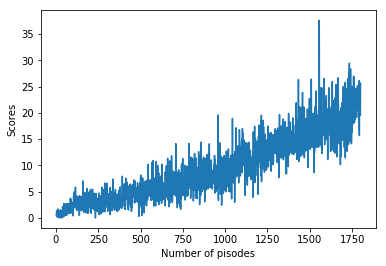

In [18]:
# plot the outcomes
import matplotlib.pyplot as plt

figure = plt.figure()
ax = figure.add_subplot(111)
plt.plot(range(1, len(scores) + 1), scores)
plt.xlabel('Number of pisodes')
plt.ylabel('Scores')
plt.savefig('DDPG_results.png')
plt.show()